# Setup
Use pip to download and install the necessary libraries if needed

In [ ]:
!pip install --upgrade pma_python
!pip install --upgrade pprint

In [1]:
#
# helper libraries
#
import pprint as pp    # pretty print library is better to print list and dictionary structures
import os
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

#
# pma_php library
#
from pma_python2 import core
print("pma_python library loaded; version", core.__version__)

# connection parameters to be used throughout this notebook
pma_start_slide_dir = "C:/wsi"

if core.is_lite():
    print ("Connected to PMA.start")
else:
    raise Exception("Unable to detect PMA.start! Please start PMA.start, or download it from http://free.pathomation.com")

pma_python library loaded; version 2.0.0.84
Connected to PMA.start


In [2]:
# only needed when debugging code for extra error messages:
core.set_debug_flag(True)

Debug flag enabled. You will receive extra feedback and messages from pma_python (like this one)


# PMA.start examples
example 10: identifying PMA.start

In [ ]:
# are you running PMA.start on localhost?
print("Are you running PMA.start? " + str(core.is_lite()))

# testing actual "full" PMA.core instance that's out there
pma_core_location = "https://host.pathomation.com/sandbox/2/pma.core"
print("Are you running PMA.start at " + pma_core_location + "? " + str(core.is_lite(pma_core_location)))

# testing against a non-existing end-point
pma_core_location = "https://www.google.com"
print("Are you running PMA.start at " + pma_core_location + "? " + str(core.is_lite(pma_core_location)))

example 20: getting version information about PMA.start

In [ ]:
# assuming we have PMA.start running; what's the version number?
print("You are running PMA.start version " + core.get_version_info())

example 30: connect to PMA.start

In [3]:
sessionID = core.connect()        # no parameters needed for PMA.start

if (sessionID == None):
	print("Unable to connect to PMA.start");
else:
	print("Successfully connected to PMA.start; sessionID = ", sessionID)

Successfully connected to PMA.start; sessionID =  SDK.Python


example 40: getting drive letters from PMA.start

In [ ]:
print("You have the following drives in your system: ")
rootdirs = core.get_root_directories()
pp.pprint(rootdirs)

example 60: getting directories PMA.start

In [ ]:
rootdirs = core.get_root_directories();
print("Directories found in ", rootdirs[0],":")

dirs = core.get_directories(rootdirs[0])
pp.pprint(dirs)

example 70: get first non empty directory PMA.start

In [ ]:
slide_dir = core.get_first_non_empty_directory()
print (slide_dir)

example 80: getting slides PMA.start (recursively and non-recursively)

In [ ]:
slide_dir = pma_start_slide_dir
print("Looking for slides in " + slide_dir)
print()

print ("**Non-recursive:")
print(core.get_slides(slide_dir))

print ("\n**One-level deep recursion:")
print(core.get_slides(slide_dir, recursive = 1))

print ("\n**Full recursion:")
print(core.get_slides(slide_dir, recursive = True))


example 90: get UID for a slide in PMA.start

In [ ]:
slide_dir = pma_start_slide_dir

print("Looking for slides in " + slide_dir)
print()

for slide in core.get_slides(slide_dir):
	print (slide," - ", core.get_uid(slide))

example 100: get fingerprint for a slide in PMA.start

In [ ]:
slide_dir = pma_start_slide_dir

print("Looking for slides in " + slide_dir)
print()

for slide in core.get_slides(slide_dir):
	print (slide," - ", core.get_fingerprint(slide))

example 110: SlideInfo PMA.start

In [ ]:
slide_dir = pma_start_slide_dir
print("Looking for slides in", slide_dir)
print()

for slide in core.get_slides(slide_dir):
    print("***", slide)
    try:
        pp.pprint(core.get_slide_info(slide))
    except:
        print("**Unable to get slide info from this one")

example 115: SlideInfo on an empty file PMA.start

In [ ]:
slide_path = (os.getcwd() + "\\").replace("\\\\", "\\") + "temp.ndpi"
open(slide_path, 'a').close()
print("Created", slide_path)
translated_path = slide_path.replace("\\", "/")
print("Getting info on", translated_path)
core.get_slide_info(translated_path)
os.remove(slide_path)

example 120: slide dimensions PMA.start

In [ ]:
for slide in core.get_slides(pma_start_slide_dir):
    print("[" + slide + "]")
    try:
        xdim_pix, ydim_pix = core.get_pixel_dimensions(slide)
        xdim_phys, ydim_phys = core.get_physical_dimensions(slide)

        print("Pixel dimensions of slide: ", end="")
        print(xdim_pix, "x", ydim_pix)

        print("Slide surface area represented by image: ", end="")
        print(str(xdim_phys) + "µm x " + str(ydim_phys) + "µm = ", end="")
        print(xdim_phys * ydim_phys / 1E6, " mm2")
        
    except:
        print("**Unable to parse", slide)

example 130: get all files that make up a particular slide

In [5]:
for slide in core.get_slides(pma_start_slide_dir):
    print(slide);
    pp.pprint(core.get_files_for_slide(slide))

C:/wsi/CMU-1 - Copy.svs
{'C:\\wsi\\CMU-1 - Copy.svs': {'LastModified': None, 'Size': 0}}
C:/wsi/CMU-1.mrxs
{'C:\\wsi\\CMU-1.mrxs': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0000.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0001.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0002.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0003.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0004.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0005.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0006.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0007.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0008.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0009.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0010.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\Data0011.dat': {'LastModified': None, 'Size': 0},
 'C:\\wsi\\CMU-1\\

example 140: who are you in PMA.start

In [ ]:
core.who_am_i()

example 150: investigate zoomlevels PMA.start

In [4]:
for slide in core.get_slides(pma_start_slide_dir):
    print("***", slide)
    print("  max zoomlevel:", core.get_max_zoomlevel(slide))
    print("  zoomlevel list:")
    pp.pprint(core.get_zoomlevels_list(slide))
    print("  zoomlevel dictionary:")
    pp.pprint(core.get_zoomlevels_dict(slide))

*** C:/wsi/CMU-1 - Copy.svs
  max zoomlevel: 7
  zoomlevel list:
[0, 1, 2, 3, 4, 5, 6, 7]
  zoomlevel dictionary:
{0: (1, 1, 1),
 1: (2, 2, 4),
 2: (3, 3, 9),
 3: (6, 5, 30),
 4: (12, 9, 108),
 5: (23, 17, 391),
 6: (45, 33, 1485),
 7: (90, 65, 5850)}
*** C:/wsi/CMU-1.mrxs
  max zoomlevel: 8
  zoomlevel list:
[0, 1, 2, 3, 4, 5, 6, 7, 8]
  zoomlevel dictionary:
{0: (1, 1, 1),
 1: (2, 2, 4),
 2: (3, 3, 9),
 3: (5, 6, 30),
 4: (9, 12, 108),
 5: (17, 24, 408),
 6: (34, 47, 1598),
 7: (67, 93, 6231),
 8: (134, 186, 24924)}
*** C:/wsi/CMU-1.ndpi
  max zoomlevel: 7
  zoomlevel list:
[0, 1, 2, 3, 4, 5, 6, 7]
  zoomlevel dictionary:
{0: (1, 1, 1),
 1: (2, 2, 4),
 2: (4, 3, 12),
 3: (7, 5, 35),
 4: (13, 10, 130),
 5: (25, 19, 475),
 6: (50, 38, 1900),
 7: (100, 75, 7500)}
*** C:/wsi/CMU-1.svs
  max zoomlevel: 7
  zoomlevel list:
[0, 1, 2, 3, 4, 5, 6, 7]
  zoomlevel dictionary:
{0: (1, 1, 1),
 1: (2, 2, 4),
 2: (3, 3, 9),
 3: (6, 5, 30),
 4: (12, 9, 108),
 5: (23, 17, 391),
 6: (45, 33, 1485),
 7

example 160: investigate magnification characteristics PMA.start

In [ ]:
for slide in core.get_slides(pma_start_slide_dir):
    

example 170: get barcode from slide in PMA.start

In [12]:
for slide in core.get_slides(pma_start_slide_dir, recursive=True):
    try:
        print(slide, " - ", core.get_barcode_text(slide))
    except:
        print("*Skipping", slide)

http://localhost:54001/api/json/GetDirectories?sessionID=SDK.Python&path=C%3A%2Fwsi
http://localhost:54001/api/json/GetDirectories?sessionID=SDK.Python&path=C%3A%2Fwsi%2FHuron
http://localhost:54001/api/json/GetDirectories?sessionID=SDK.Python&path=C%3A%2Fwsi%2FOpenSlide
http://localhost:54001/api/json/GetDirectories?sessionID=SDK.Python&path=C%3A%2Fwsi%2Fp9997
http://localhost:54001/api/json/GetDirectories?sessionID=SDK.Python&path=C%3A%2Fwsi%2Fp9997%2Fbrightfield
http://localhost:54001/api/json/GetDirectories?sessionID=SDK.Python&path=C%3A%2Fwsi%2Fp9997%2Fbrightfield%2F3DHistech
http://localhost:54001/api/json/GetDirectories?sessionID=SDK.Python&path=C%3A%2Fwsi%2Fp9997%2Fbrightfield%2FAperio
http://localhost:54001/api/json/GetDirectories?sessionID=SDK.Python&path=C%3A%2Fwsi%2Fp9997%2Fbrightfield%2FAperio%2FCMU-1
http://localhost:54001/api/json/GetDirectories?sessionID=SDK.Python&path=C%3A%2Fwsi%2Fp9997%2Fbrightfield%2FAperio%2FCMU-2
http://localhost:54001/api/json/GetDirectories?sess

C:/wsi/OpenSlide/OS-2.ndpi  -  477130
C:/wsi/p9997/brightfield/3DHistech/CMU-1.mrxs  -  
C:/wsi/p9997/brightfield/Aperio/CMU-1.svs  -  
C:/wsi/p9997/brightfield/Aperio/CMU-1-JP2K-RGB.svs  -  
C:/wsi/p9997/brightfield/Aperio/CMU-2.svs  -  
C:/wsi/p9997/brightfield/Aperio/CMU-3.svs  -  
C:/wsi/p9997/brightfield/Aperio/JP2K-YCBCR-1.svs  -  
C:/wsi/p9997/brightfield/Aperio/JP2K-YCBCR-2.svs  -  
C:/wsi/p9997/brightfield/Aperio/CMU-1/index.cws  -  
C:/wsi/p9997/brightfield/Aperio/CMU-2/index.cws  -  
C:/wsi/p9997/brightfield/Aperio/CMU-3/index.cws  -  
C:/wsi/p9997/brightfield/Generic_Jpeg/jpg01_julia_4K.jpg  -  
C:/wsi/p9997/brightfield/Generic_Jpeg/jpg02_mandel_10k.jpg  -  
C:/wsi/p9997/brightfield/Generic_Jpeg/jpg03_uid_test.jpg  -  
C:/wsi/p9997/brightfield/Generic_Jpeg2000/4805-9_201407311755.jp2  -  
C:/wsi/p9997/brightfield/Generic_Jpeg2000/HEsample.jp2  -  
C:/wsi/p9997/brightfield/Generic_Jpeg2000/iqnpath01_S14-4735 pms2.jp2  -  
C:/wsi/p9997/brightfield/Generic_Jpeg2000/iqnpath02_S

C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_0.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_1.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_10.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_11.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_2.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_3.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_4.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_5.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_6.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_7.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_8.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/3_9.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_Szi/CMU-1/CMU-1_files/12/4_0.jpeg  -  
C:/wsi/p9997/brightfield/Smartzoom_S

example 180: show a slide through PMA.start

In [24]:
slides = core.get_slides(pma_start_slide_dir)
print(slides[0])
core.show_slide(slides[0])

C:/wsi/CMU-1 - Copy.svs


example 190: slide label (URL) in PMA.start

http://localhost:54001/barcode?SessionID=SDK.Python&pathOrUid=C%3A%2Fwsi%2FCMU-1%20-%20Copy.svs


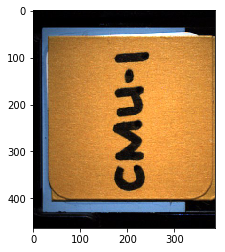

In [22]:
slide = core.get_slides(pma_start_slide_dir)[0]
print(core.get_label_url(slide))
imshow(core.get_label_image(slide))

In [ ]:
example 195: slide label (URL) in PMA.start (using barcode alias methods)

http://localhost:54001/barcode?SessionID=SDK.Python&pathOrUid=C%3A%2Fwsi%2FCMU-1%20-%20Copy.svs


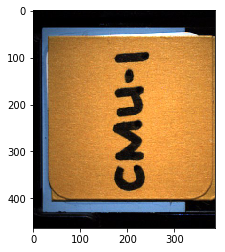

In [23]:
slide = core.get_slides(pma_start_slide_dir)[0]
print(core.get_barcode_url(slide))
imshow(core.get_barcode_image(slide))